In [148]:
#Import Librairies

import pandas as pd
import numpy as np
import os
import glob
import csv
#import Selenium for webscraping
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
sns.set(style= 'darkgrid')
sns.set_palette('deep')


#transformations
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score


In [149]:
#Model 2 without the categories dummies 

In [150]:
#read dataset books_cleaned.csv
df3 = pd.read_csv('file_4_prediction_csv.csv',sep=';')

In [151]:
#show the dataset columns and their data types 
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11076 non-null  int64  
 1   title               11076 non-null  object 
 2   authors             11076 non-null  object 
 3   average_rating      11076 non-null  float64
 4   isbn                11076 non-null  object 
 5   isbn13              11076 non-null  object 
 6   language_code       11076 non-null  object 
 7   num_pages           11076 non-null  int64  
 8   ratings_count       11076 non-null  int64  
 9   text_reviews_count  11076 non-null  int64  
 10  publication_date    11076 non-null  object 
 11  publisher           11076 non-null  object 
 12  categories          10679 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [152]:
#remove form the dataset isbn, isbn13, categories
df3.drop(['isbn', 'isbn13', 'categories','publication_date','bookID','text_reviews_count'], axis=1, inplace=True)

In [153]:
# Create features lists and separate categorical and numerical features based on the data type
categorical_features = df3.select_dtypes(include=['object']).columns.tolist()

In [154]:

#create a list of numerical features with no duplicates

numerical_features = df3.select_dtypes(include=['int64', 'float64']).columns.tolist()

print('categorical column of the dataset are : \n', categorical_features)
print('\n numerical column of the dataset are : \n', numerical_features)

categorical column of the dataset are : 
 ['title', 'authors', 'language_code', 'publisher']

 numerical column of the dataset are : 
 ['average_rating', 'num_pages', 'ratings_count']


In [155]:
#get dummies of the categorical features
df3 = pd.get_dummies(df3, columns=categorical_features, drop_first=True)

In [156]:
#define a function to remove outliers with IQR
def remove_outliers(df3, col):
    q1 = df3[col].quantile(0.25)
    q3 = df3[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df3[(df3[col] > lower_bound) & (df3[col] < upper_bound)]

In [157]:
#remove outliers from the numerical columns and print the number of rows before and after removing outliers
for col in numerical_features[1:3]:
    print(f'Before removing outliers from {col} : {df3.shape[0]}')
    df3 = remove_outliers(df3, col)
    print(f'After removing outliers from {col} : {df3.shape[0]}')

Before removing outliers from num_pages : 11076
After removing outliers from num_pages : 10523
Before removing outliers from ratings_count : 10523
After removing outliers from ratings_count : 8900


In [158]:
#normalize the numerical features

numerical_features.remove('average_rating')
df3[numerical_features] = df3[numerical_features].apply(lambda x: (x - x.min()) / (x.max()-x.min()) )

In [159]:
#split the dataset into train and test set

X = df3.drop('average_rating', axis=1)
y = df3['average_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
#lenght df3
print(len(df3))

#lenght df3_test
print(len(X_test))

#length df3_train
print(len(X_train))

8900
1780
7120


In [161]:
#train a linear regression model

lr = LinearRegression()
lr.fit(X_train, y_train)

#predict the test set
y_test_pred_lr = lr.predict(X_test)

#predict the train set
y_train_pred_lr = lr.predict(X_train)


#print the MAE, MSE, R^2, RMSE for the train and test set
print('MAE in Linear Regression train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred_lr),
        mean_absolute_error(y_test, y_test_pred_lr)))
print('MSE in Linear Regression train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_lr),
        mean_squared_error(y_test, y_test_pred_lr)))
print('R^2 in Linear Regression train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_lr),
        r2_score(y_test, y_test_pred_lr)))
print('RMSE in Linear Regression train: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)),
        np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr))))


MAE in Linear Regression train: 0.000, test: 0.208
MSE in Linear Regression train: 0.000, test: 0.110
R^2 in Linear Regression train: 1.000, test: 0.113
RMSE in Linear Regression train: 0.000, test: 0.331


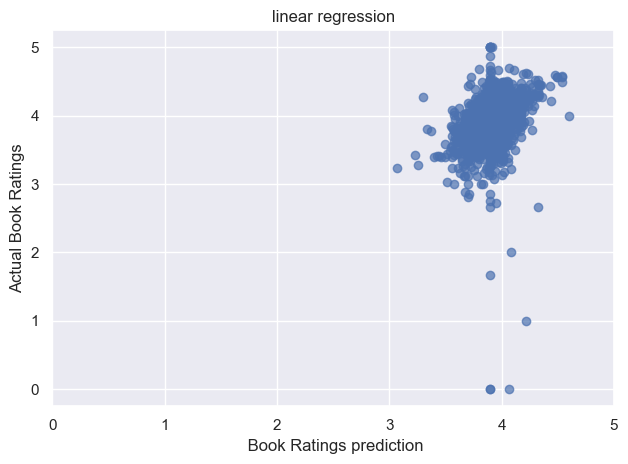

In [162]:
plt.scatter(y_test_pred_lr, y_test, alpha = 0.7, color = 'b')
plt.xlabel(' Book Ratings prediction')
plt.ylabel('Actual Book Ratings')
plt.title('linear regression')
plt.tight_layout()
plt.xlim(0,5)
plt.show()

(0.0, 5.0)

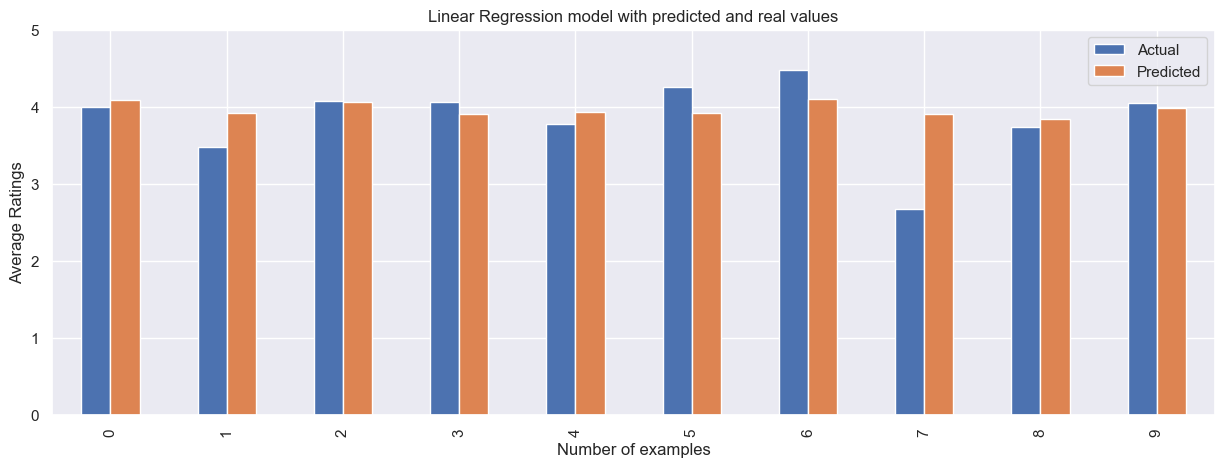

In [163]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_pred_lr.tolist()}).head(10)
pred.head(10)
pred.plot(kind='bar', figsize=(15, 5))
plt.title('Linear Regression model with predicted and real values')
plt.xlabel('Number of examples')
plt.ylabel('Average Ratings')
plt.ylim(0,5)

In [164]:

#train a random forest regressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#predict the test set
y_test_pred_rf = rf.predict(X_test)

#predict the train set
y_train_pred_rf = rf.predict(X_train)


#print the MAE, MSE, R^2, RMSE for the train and test set
print('MAE in Random Forest train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred_rf),
        mean_absolute_error(y_test, y_test_pred_rf)))
print('MSE in Random Forest train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_rf),
        mean_squared_error(y_test, y_test_pred_rf)))
print('R^2 in Random Forest train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_rf),
        r2_score(y_test, y_test_pred_rf)))
print('RMSE in Random Forest train: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf)),
        np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))))


MAE in Random Forest train: 0.079, test: 0.223
MSE in Random Forest train: 0.015, test: 0.108
R^2 in Random Forest train: 0.890, test: 0.127
RMSE in Random Forest train: 0.122, test: 0.329


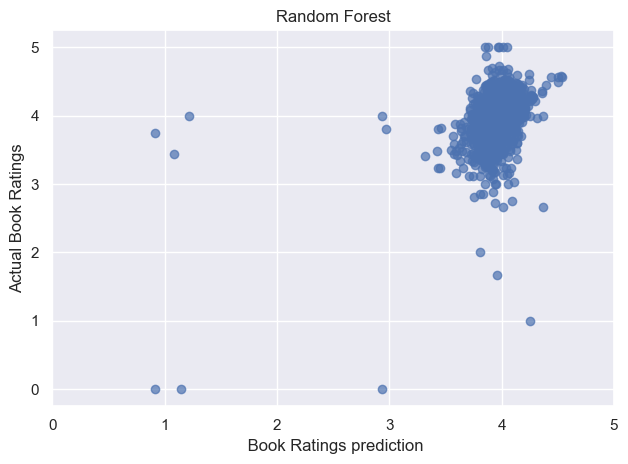

In [165]:
plt.scatter(y_test_pred_rf, y_test, alpha = 0.7, color = 'b')
plt.xlabel(' Book Ratings prediction')
plt.ylabel('Actual Book Ratings')
plt.title('Random Forest')
plt.tight_layout()
plt.xlim(0,5)
plt.show()

In [166]:
#Ridge regression

#train a ridge regression
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

#predict the test set
y_test_pred_ridge = ridge.predict(X_test)

#predict the train set
y_train_pred_ridge = ridge.predict(X_train)
#print the MAE, MSE, R^2, RMSE for the train and test set
print('MAE in Ridge train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred_ridge),
        mean_absolute_error(y_test, y_test_pred_ridge)))
print('MSE in Ridge train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_ridge),
        mean_squared_error(y_test, y_test_pred_ridge)))
print('R^2 in Ridge train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_ridge),
        r2_score(y_test, y_test_pred_ridge)))
print('RMSE in Ridge train: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ridge)),
        np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge))))


MAE in Ridge train: 0.067, test: 0.206
MSE in Ridge train: 0.010, test: 0.107
R^2 in Ridge train: 0.924, test: 0.136
RMSE in Ridge train: 0.101, test: 0.327


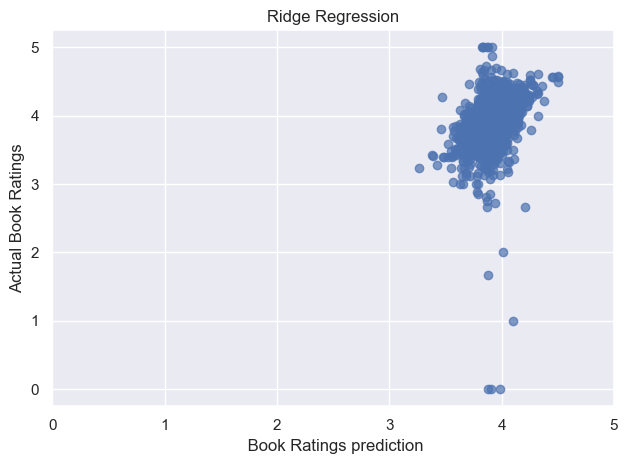

In [167]:
plt.scatter(y_test_pred_ridge, y_test, alpha = 0.7, color = 'b')
plt.xlabel(' Book Ratings prediction')
plt.ylabel('Actual Book Ratings')
plt.title('Ridge Regression')
plt.tight_layout()
plt.xlim(0,5)
plt.show()

(0.0, 5.0)

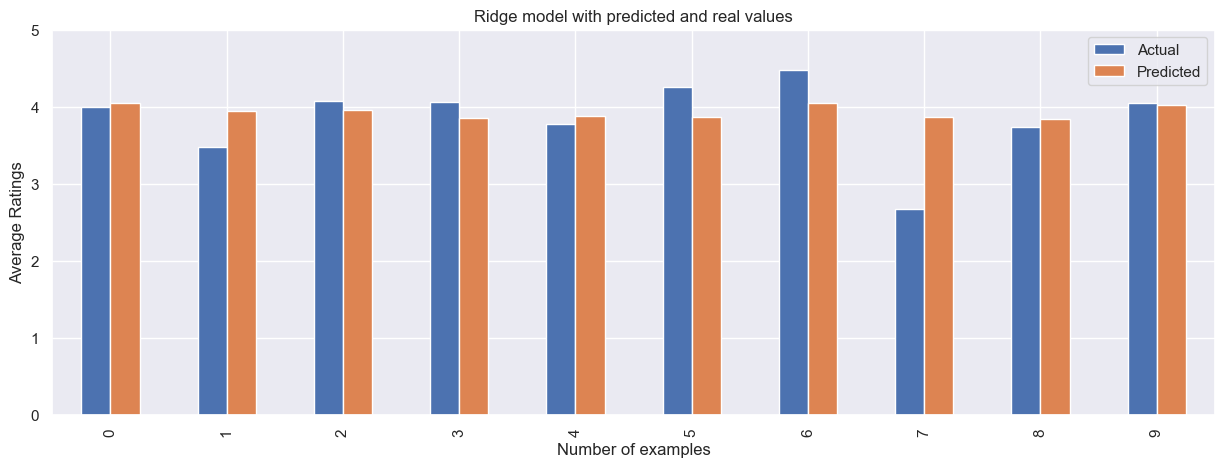

In [168]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_pred_ridge.tolist()}).head(10)
pred.head(10)
pred.plot(kind='bar', figsize=(15, 5))
plt.title('Ridge model with predicted and real values')
plt.xlabel('Number of examples')
plt.ylabel('Average Ratings')
plt.ylim(0,5)